# Исследование закономерностей, определяющих успешность игры

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).\
\
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.\
\
На основе данных о продаже компьютерных игр, необходимо сделать выводы об успешности проектов и выявить ключевые факторы этого успеха. В будущем это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Вывод
Проведя исследовательский анализ данных, мы определили, что самым `актуальным периодом` для формирования прогноза прибыльности игр на **2017** г. является период **с 2014 по 2016** гг.\
Самыми `потенциально прибыльными платформами` являются **PS4** и **Xbox One**, немного отстаёт от них **3DS**. Хоть рынок и находится в состоянии снижения прибыльности платформ, но данные платформы показывают лучшие результаты из всех. На третьем месте по привлекательности находится платформа от Nintendo - **3DS** и её точно стоит рассмотреть, особенно если планируется выпускать игру на рынке `Японии` - там **3DS** является лидером по продажам.\
Выбрав эти 3 платформы, можно охватить большую часть рынков `Северной Америки`, `Европы` и `Японии`.
`Средняя продолжительность жизни` платформы - около **10 лет**, а значит данные платформы ближайшие несколько лет будут актуальны.\
\
Что касается `жанра`, то стоит рассмотреть **Shooter**, как `самый прибыльный` на одну выпущенную игру. Также прибыльностью отличаются игры жанров **Sports**, **Platform**, **Fighting** и **Role-Playing**. Жанр **Action** повсеместно очень популярен, но в нём самая `высокая конкуренция` и в среднем `проект собирает значительно меньшие продажи`, чем в указанных выше жанрах.\
Что касается `приоритета игроков`, то, судя по продажам, можно выделить жанры **Shooter** и **Action** в `Северной Америке` и `Европе` и **Role-Playing** и **Action** в `Японии`.
\
Относительно возрастного рейтинга можно сказать, что в `Северной Америке` и `Европе` популярны игры с возрастным ограничением **до 17 лет**. Насчёт `Японии` можно сделать такое же предположение, однако имеющихся данных по региону недостаточно чтобы это подтвердить: очень много проектов без оценки рейтинга.\
\
Также не стоит забывать, что на выбранных платформах - **PS4**, **Xbox One** на продажи `существенно влияют оценки критиков`, а на платформе **3DS** ещё и `отзывы пользователей`.

## Открываем файл с данными и изучаем общую информацию, обрабатываем данные

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
sns.set()

In [2]:
# читаем файл csv
df = pd.read_csv('games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Описание данных
**name** — название игры\
**platform** — платформа\
**year_of_release** — год выпуска\
**genre** — жанр игры\
**na_sales** — продажи в Северной Америке (миллионы проданных копий)\
**eu_sales** — продажи в Европе (миллионы проданных копий)\
**jp_sales** — продажи в Японии (миллионы проданных копий)\
**other_sales** — продажи в других странах (миллионы проданных копий)\
**critic_score** — оценка критиков (максимум 100)\
**user_score** — оценка пользователей (максимум 10)\
**rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [3]:
# приводим названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# изучаем общую информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# ищем пропущенные значения
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

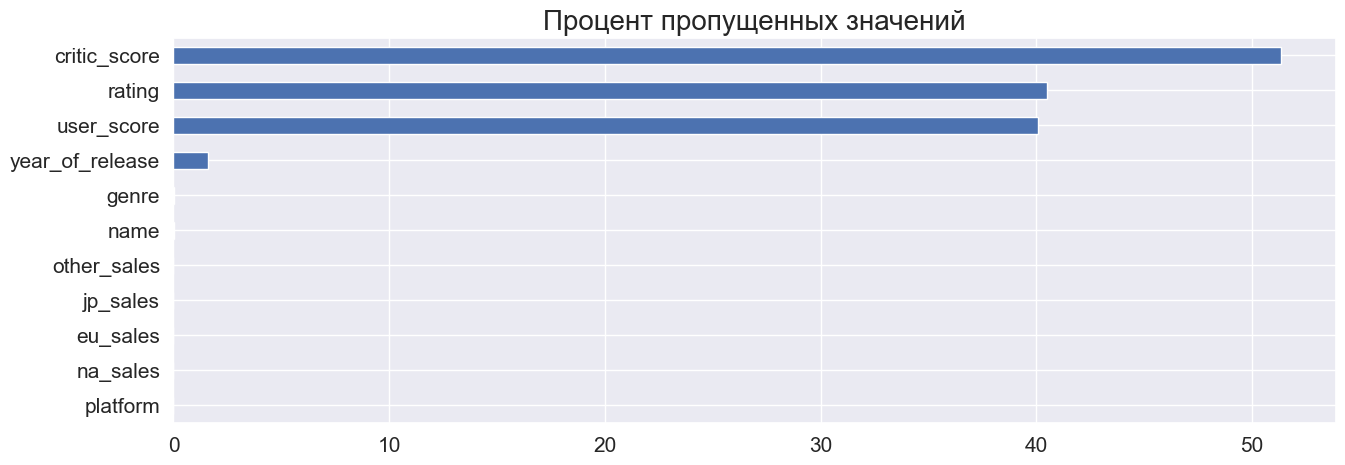

In [6]:
# строим график пропущенных значений
def na_values(df):
    (
        (
            df
            .isna()
            .mean() * 100
        )
        .sort_values()
        .plot
            (
                kind='barh',
                figsize=(15,5),
                fontsize=15,
                grid=True
            )
    )
plt.title('Процент пропущенных значений', fontsize=20)
na_values(df)

Видим больше **50%** пропусков в столбце `оценка критиков` и больше **40%** в столбцах `рейтинг` и `оценка пользователей`. В остальных столбцах пропусков значительно меньше.

Пропусков в `названии игры` и `жанре` совсем немного, предположим, что они появились случайно. Их некорректно заполнять нулём, но, так как строк всего 2, просто удалим их из данных.\
Пропусков в столбце `год выпуска` больше. Причина появления неизвестна. Так как усреднённые значения могут привести к ошибкам в выводах, а количество строк небольшое, удалим эти данные.

In [7]:
# выводим строки с пропусками в "name"
df.loc[df['name'].isna()]
# в этих же строках пропуски в "genre", удаляем эти строки
df = df.drop(df.index[[659,14244]])
# удаляем строки с пропусками в "year_of_release"
df = df.loc[df['year_of_release'].isna() != True]
# сбрасываем индексы
df.reset_index(drop=True, inplace=True)
# проверяем результат
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Разберёмся с пропусками в столбцах `оценка критиков` и `оценка пользователей`.\
Проверим уникальные значения.\
В столбце оценка пользователей помимо пропущенных значений, есть значение **tbd**, проверим их количество.\
Поиск выдал, что **tbd** - это **to be determind**, то есть для этих проектов ещё нет оценки от игроков.\
Проверим разброс строк с пропущенными значениями по годам. Возможно оценки нет у новых проектов.\
Среди проектов с пропусками в столбце `оценка критиков` или `оценка пользователей` есть проекты разных годов. Возможно для этих проектов просто нет достаточного количества обзоров. Заполним пропуски 0. То же самое сделаем со значением **tbd**.

In [8]:
# проверяем уникальные значения "critic_score"
df['critic_score'].unique()
# смотрим разброс по годам
df.loc[df['critic_score'].isna(), 'year_of_release'].unique()
# заполняем пропуски нулём
df.loc[df['critic_score'].isna(), 'critic_score'] = 0
# проверяем уникальные значения "user_score"
df['user_score'].unique()
# проверяем количество значений "tbd"
df.loc[df['user_score'] == 'tbd', 'user_score'].count()
# смотрим разброс по годам
df.loc[(df['user_score'].isna()) |
       (df['user_score'] == 'tbd'), 'year_of_release'].unique()
# заполняем пропуски нулём
df.loc[(df['user_score'].isna()) |
       (df['user_score'] == 'tbd'), 'user_score'] = 0
# проверяем результат
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6676
dtype: int64

Разберёмся с пропусками в столбце `рейтинг`.\
Так как значения в столбце категориальные, а пропущенные значения, скорее всего, проекты - ещё, или совсем не получившие эту оценку, то все пропуски заполним как **not_rated**.

In [9]:
# проверяем уникальные значения "critic_score"
df['rating'].unique()
# смотрим разброс по годам
df.loc[df['rating'].isna(), 'year_of_release'].unique()
# заполняем пропуски "not_rated"
df.loc[df['rating'].isna(), 'rating'] = 'not_rated'
# проверяем результат
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Поменяем тип данных.\
У столбца `год выпуска` на **int**, так как дата представлена только номером года и не может быть не цельночисленной.\
У столбцов с `объёмом продаж по регионам`, а также у столбца `оценка пользователей` - на **float32**, так как значения вещественные и для экономии памяти.\
У столбца `оценка критиков` - на **int**, так как значения в нём цельночисленные.

In [10]:
# меняем тип данных столбцов
df = (
    df
    .astype
    (
        {
            'year_of_release': 'int',
            'na_sales': 'float32',
            'eu_sales': 'float32',
            'jp_sales': 'float32',
            'other_sales': 'float32',
            'critic_score': 'int',
            'user_score': 'float32'
        }
    )
)

# проверяем результат
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float32
 5   eu_sales         16444 non-null  float32
 6   jp_sales         16444 non-null  float32
 7   other_sales      16444 non-null  float32
 8   critic_score     16444 non-null  int32  
 9   user_score       16444 non-null  float32
 10  rating           16444 non-null  object 
dtypes: float32(5), int32(2), object(4)
memory usage: 963.6+ KB


Посчитаем суммарные продажи по всем регионам.

In [11]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.360001,28.959999,3.77,8.45,76,8.0,E,82.539993
1,Super Mario Bros.,NES,1985,Platform,29.080000,3.580000,6.81,0.77,0,0.0,not_rated,40.240002
2,Mario Kart Wii,Wii,2008,Racing,15.680000,12.760000,3.79,3.29,82,8.3,E,35.520000
3,Wii Sports Resort,Wii,2009,Sports,15.610000,10.930000,3.28,2.95,80,8.0,E,32.770000
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270000,8.890000,10.22,1.00,0,0.0,not_rated,31.380001


## Исследовательский анализ данных

### Количество игр по годам

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

Text(0, 0.5, 'Количество игр')

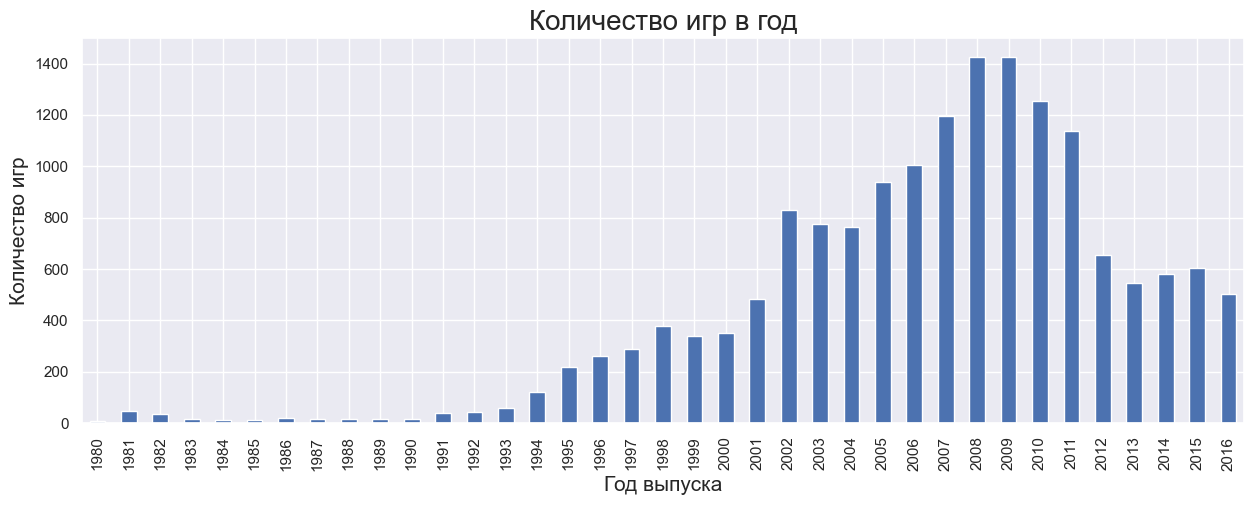

In [12]:
# считаем количество уникальных годов
len(df['year_of_release'].unique())
# строим график выпуска игр по годам
display(df['year_of_release'].describe())
(
    df
    .groupby('year_of_release')
    .agg({'name': 'count'})
    .plot
    (
        kind='bar',
        figsize=(15,5),
        grid=True,
        legend=False
    )
)
plt.title('Количество игр в год', fontsize=20)
plt.xlabel('Год выпуска', fontsize=15)
plt.ylabel('Количество игр', fontsize=15)

По графику видно, что до 1995 года было выпущено значительно меньше игр, чем после. Поэтому данными до 1994 года включительно, можно пренебречь. Пик по количеству выпущенных игр в год приходится на 2008-2009 года.

### Продажи по платформам

Text(0, 0.5, 'Платформа')

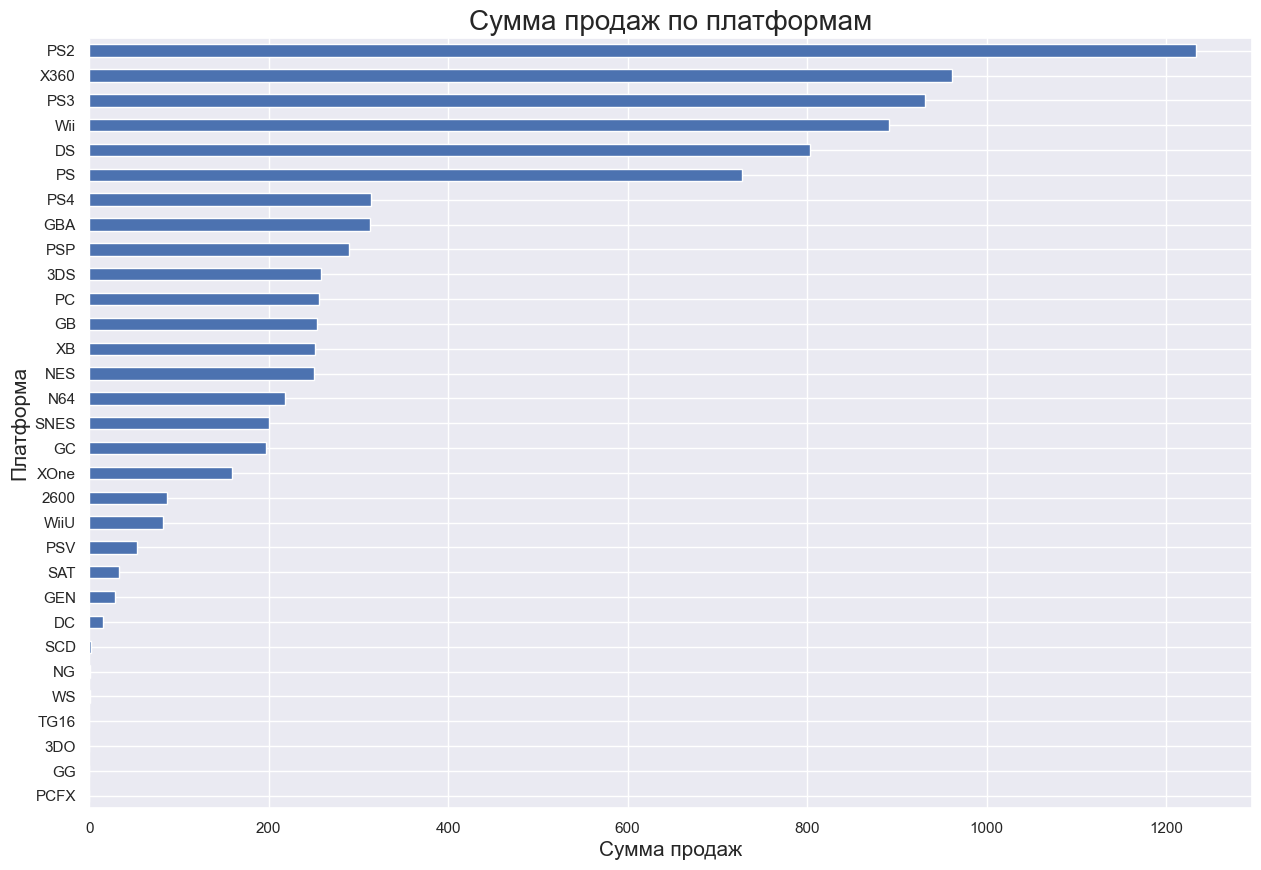

In [13]:
# считаем количество уникальных платформ
len(df['platform'].unique())
# строим график продаж по платформам
(
    df
    .groupby('platform')
    .agg({'total_sales': 'sum'})
    .sort_values(by='total_sales')
    .plot
    (
        kind='barh',
        figsize=(15,10),
        grid=True,
        legend=False
    )
)
plt.title('Сумма продаж по платформам', fontsize=20)
plt.xlabel('Сумма продаж', fontsize=15)
plt.ylabel('Платформа', fontsize=15)

На графике видим наиболее популярные и прибыльные платформы. Их 6: **PS**, **DS**, **Wii**, **PS3**, **X360**, **PS2**. \
У всех этих платформ суммарные продажи больше 700 млн. Тройка лидеров перевалила за 900 млн. Лучшие из остальных принесли в районе 300 млн.

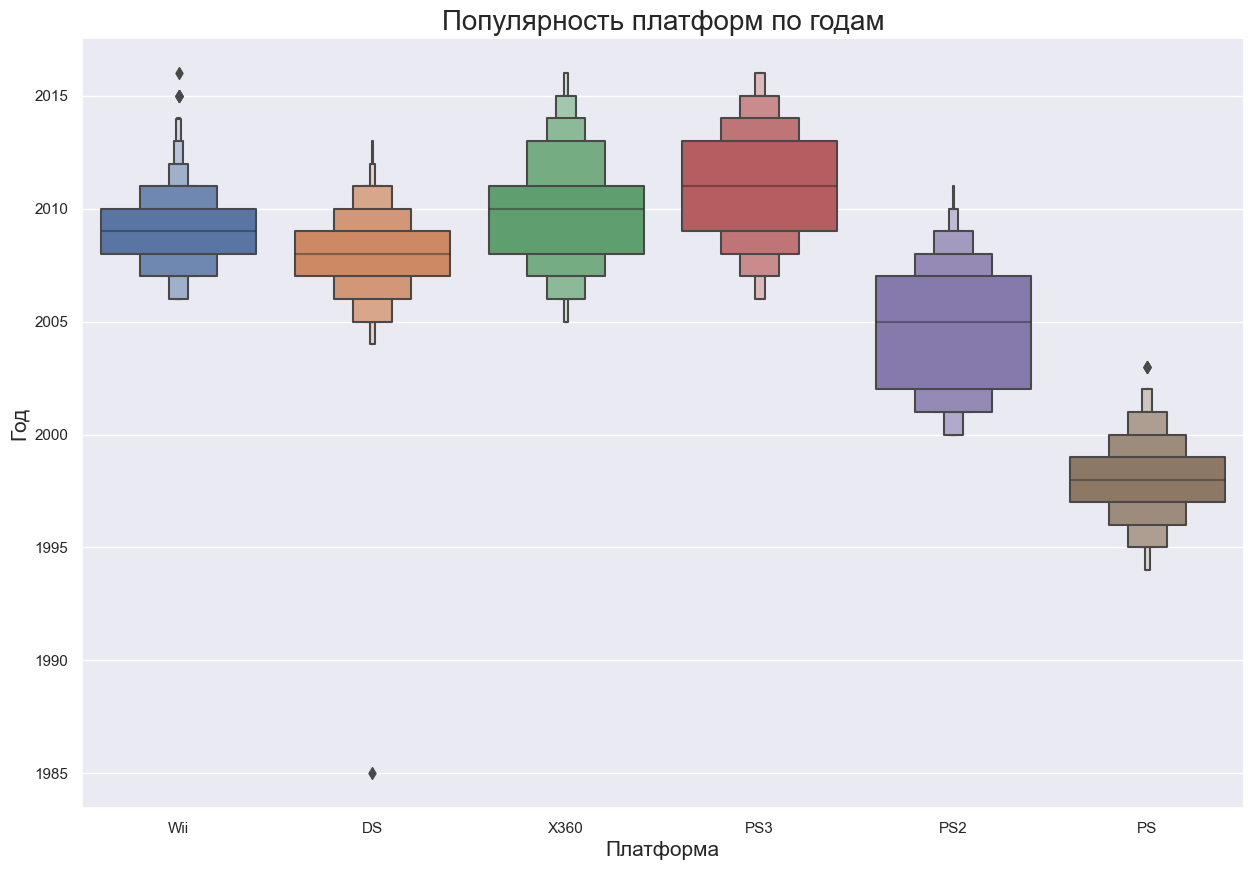

In [14]:
# строим график платформ по годам
plt.figure(figsize=(15,10))
(
    sns.boxenplot
    (
        x=df.query('platform == ["PS", "DS", "Wii", "PS3", "X360", "PS2"]')['platform'],
        y=df['year_of_release']
    )
)
plt.title('Популярность платформ по годам', fontsize=20)
plt.xlabel('Платформа', fontsize=15)
plt.ylabel('Год', fontsize=15)
plt.show()

На графике видим выброс у платформы **DS**. Платформа вышла в конце 2004 года, соответственно, игр раньше 2004 года на неё быть не может. Вернёмся к обработке данных и удалим его. Выбросы в другую сторону удалять не будем, так как новые игры с поддержкой не самой актуальной платформы выходить могут. \
\
По графику видно, что `средняя продолжительность "жизни"` платформы - `около 10 лет`. Однако, как видно на примере компании Sony, `новая консоль появляется уже примерно через 6 лет`.

In [15]:
# находим этот проект
df.loc[(df['platform'] == 'DS') &
       (df['year_of_release'] < 2004)]
# удаляем его из данных
df = df.drop(df.index[[15704]])
# сбрасываем индексы
df.reset_index(drop=True, inplace=True)

### Прогноз на 2017 год

Из графика `количества выпущенных в год игр` видно, что в 2012 году произошёл существенный спад. Учитывая это, а также то, что сфера компьютерных игр относится к динамично меняющимся, для прогноза на **2017**г. выберем период с **2014 по 2016 гг**.

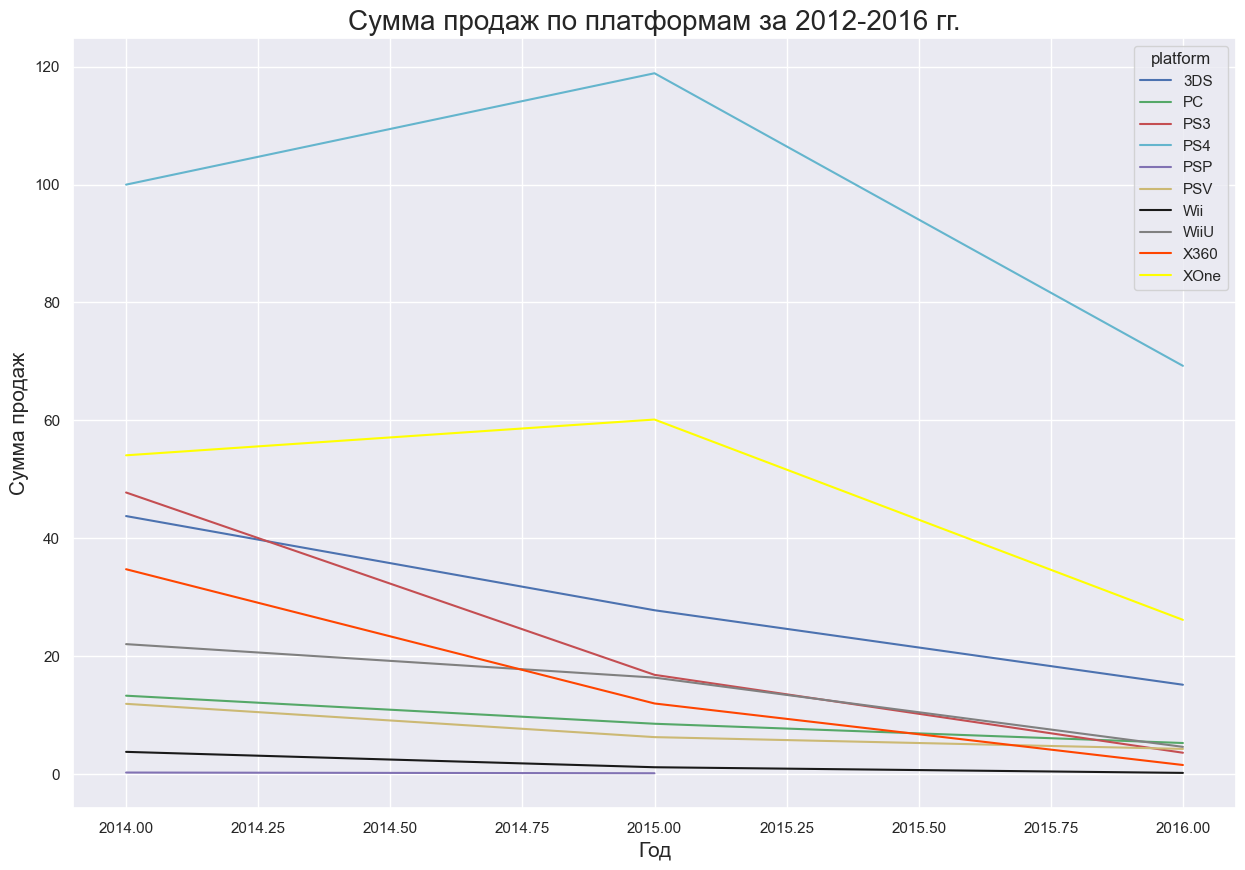

In [16]:
# # делаем срез по актуальному период
actual_period = df.query('year_of_release >= 2014').reset_index(drop=True)
# строим график платформ по годам
(
    actual_period
    .pivot_table
    (
        index='year_of_release',
        columns='platform',
        values='total_sales',
        aggfunc='sum'
    )
    .plot
    (
        figsize=(15,10),
        grid=True,
        color=['b','g','r','c','m','y','k','grey','orangered','yellow','purple']
    )
)
plt.title('Сумма продаж по платформам за 2012-2016 гг.', fontsize=20)
plt.xlabel('Год', fontsize=15)
plt.ylabel('Сумма продаж', fontsize=15)
plt.show()

На графике видим, что за исследуемый период времени (**2014-2016гг.**), у всех платформ `наблюдается спад продаж`. Исключением являлись **XOne** и **PS4** на старте их выпуска (**2013-2015гг.**). После 2015г. продажи игр на эти платформы также присоединились к общему тренду. Однако, несмотря на следование общему тренду, **XOne** и **PS4** остаются `наиболее прибыльными` и, потенциально, `наиболее интересными` платформами для выпуска новых проектов в **2017г**. Также в этот список можно добавить и **3DS**: продажи по этой платформе меньше, чем по двум лидирующим, но лучше, чем на всех остальных платформах.

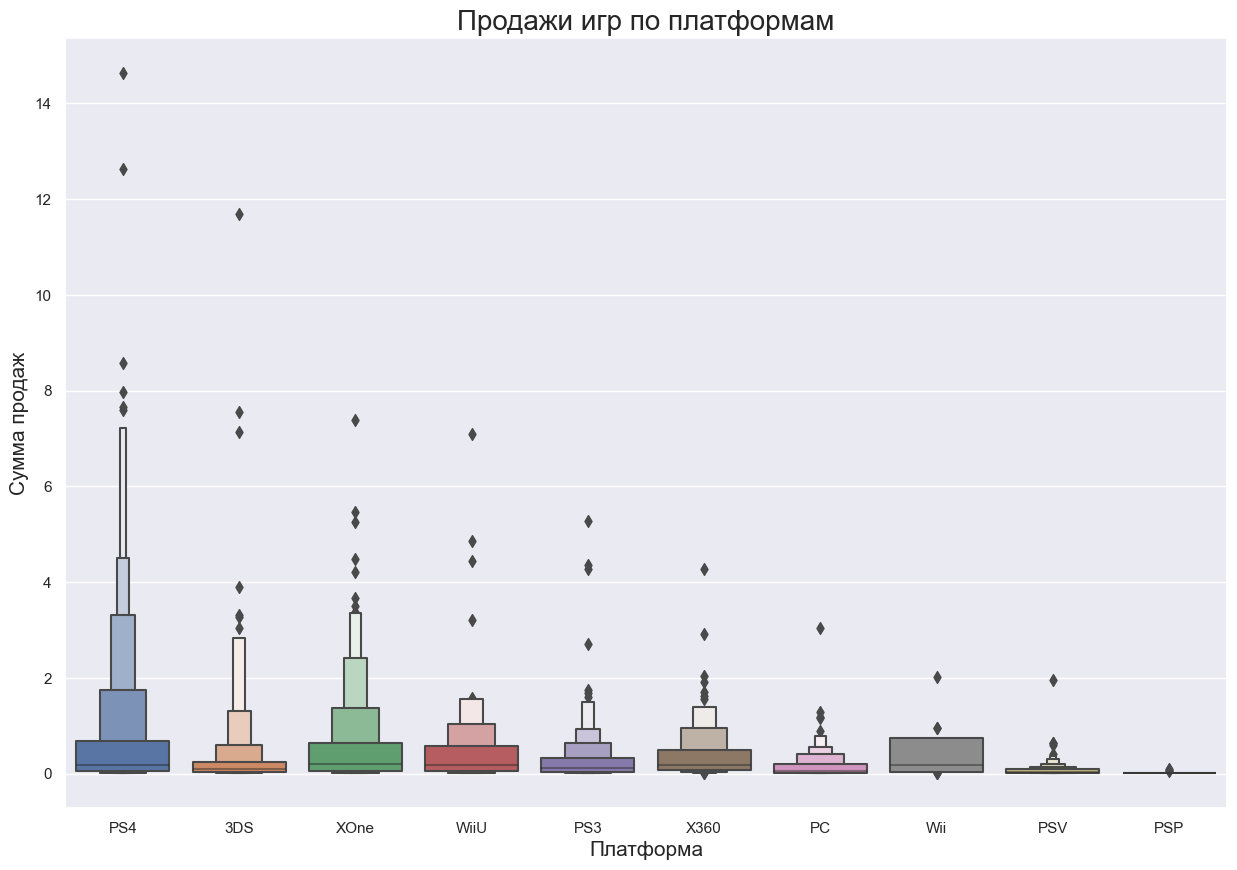

In [17]:
# строим график глобальных продаж игр по платформам
plt.figure(figsize=(15,10))
(
    sns.boxenplot
    (
        data=actual_period,
        x='platform',
        y='total_sales'
    )
)
plt.title('Продажи игр по платформам', fontsize=20)
plt.xlabel('Платформа', fontsize=15)
plt.ylabel('Сумма продаж', fontsize=15)
plt.show()

Ограничим график, по количеству продаж, чтобы лучше разглядеть медиану и 75% квантиль.

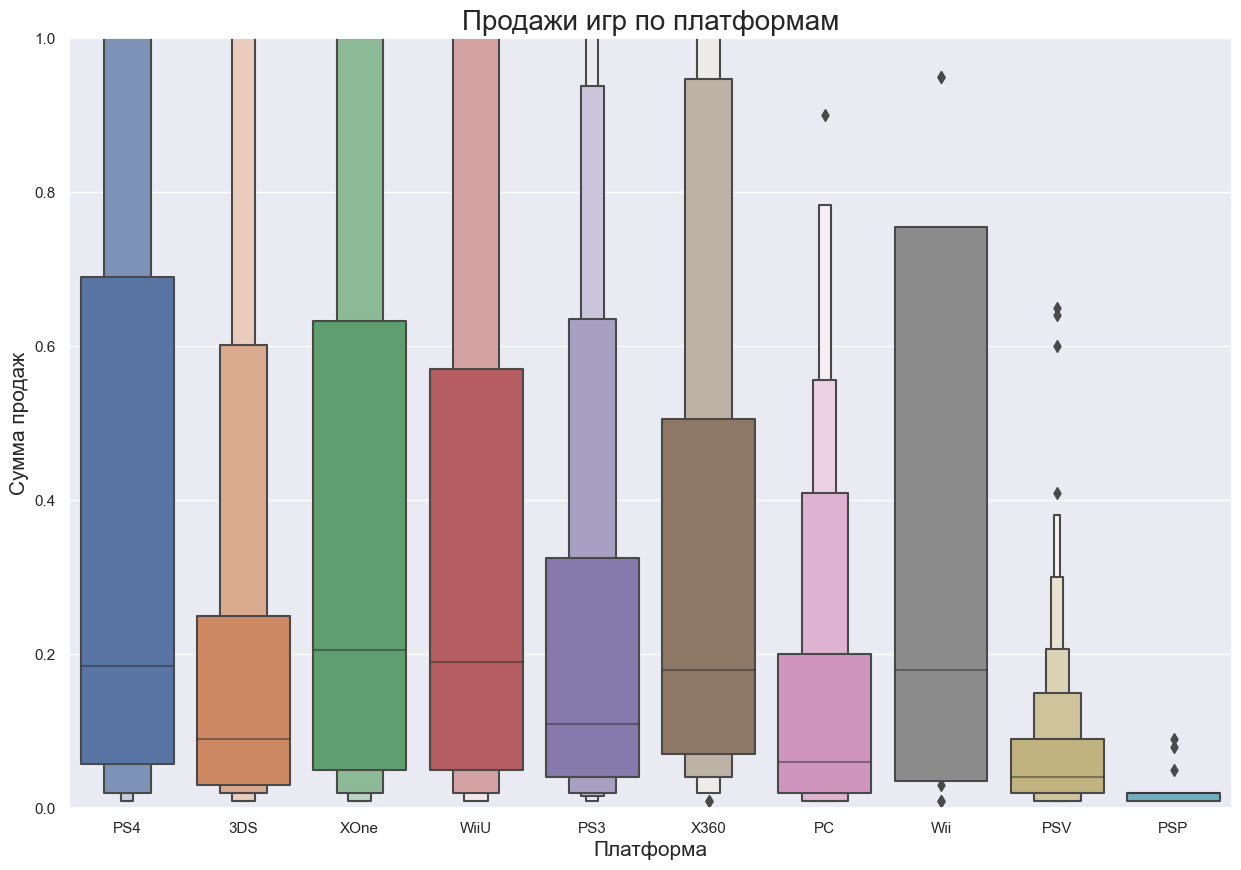

In [18]:
# строим график глобальных продаж игр по платформам
plt.figure(figsize=(15,10))
(
    sns.boxenplot
    (
        data=actual_period,
        x='platform',
        y='total_sales'
    )
)
plt.title('Продажи игр по платформам', fontsize=20)
plt.ylim(0,1)
plt.xlabel('Платформа', fontsize=15)
plt.ylabel('Сумма продаж', fontsize=15)
plt.show()

На диаграмме видим, что самые скромные результаты в плане количества и наличия бестселлеров за выбранный промежуток времени (**2014-2016гг.**) показывает **PSP**. Далее, если судить по медианному и 75% квантилю, идут **PSV**, **PC**, **3DS** и **PS3**. Лучшие показатели демонстрируют **X360**, **WiiU**, **XOne**, **Wii** и **PS4**.

### Влияние отзывов пользователей и критиков на продажи

`Самой прибыльной платформой` в последние годы `актуального периода` является **PS4**, значит сделаем срез данных по ней за годы её существования и посмотрим `корреляцию продаж с отзывами критиков и пользователей`.

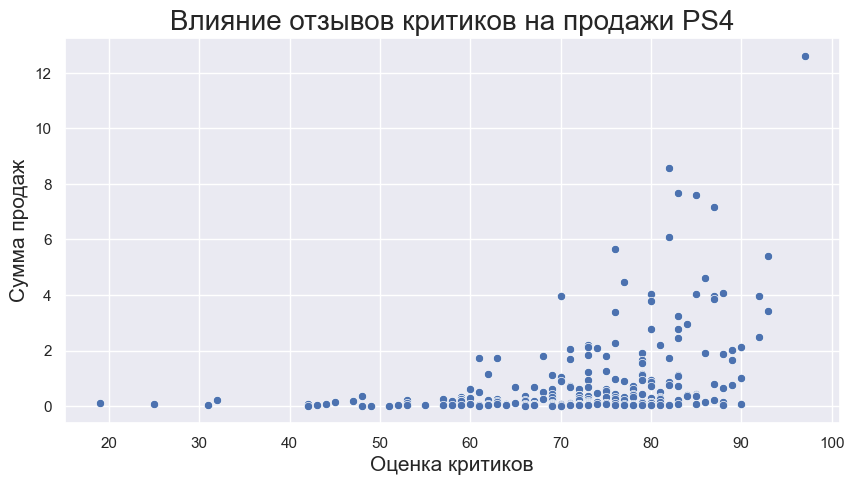

0.4

In [19]:
# PS4
# смотрим корреляцию с отзывами критиков
# делаем срез, удаляем строки с нулевым рейтингом
ps4_sales_critic_score_correlation = (
    df
    .query('year_of_release >= 2014 and platform == "PS4" and critic_score != 0')
)
# строим диаграмму рассеяния для отзывов критиков
plt.figure(figsize=(10,5))
(
    sns.scatterplot
    (
        data=ps4_sales_critic_score_correlation,
        x='critic_score',
        y='total_sales'
    )
)
plt.title('Влияние отзывов критиков на продажи PS4', fontsize=20)
plt.xlabel('Оценка критиков', fontsize=15)
plt.ylabel('Сумма продаж', fontsize=15)
plt.show()
(
    round
    (
        ps4_sales_critic_score_correlation['total_sales']
        .corr(ps4_sales_critic_score_correlation['critic_score']), 2
    )
)

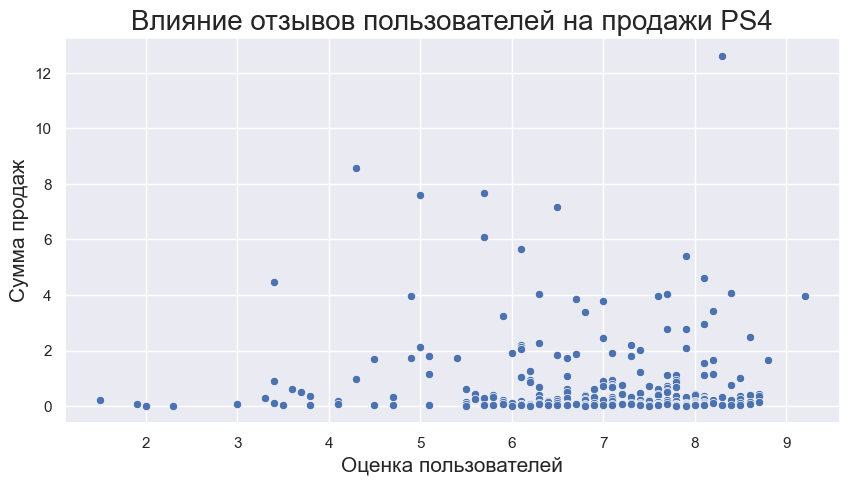

-0.04

In [20]:
# PS4
# смотрим корреляцию с отзывами пользователей
# делаем срез, удаляем строки с нулевым рейтингом
ps4_sales_user_score_correlation = (
    df
    .query('year_of_release >= 2014 and platform == "PS4" and user_score != 0')
)
# строим диаграмму рассеяния для отзывов критиков
plt.figure(figsize=(10,5))
(
    sns.scatterplot
    (
        data=ps4_sales_user_score_correlation,
        x='user_score',
        y='total_sales'
    )
)
plt.title('Влияние отзывов пользователей на продажи PS4', fontsize=20)
plt.xlabel('Оценка пользователей', fontsize=15)
plt.ylabel('Сумма продаж', fontsize=15)
plt.show()
(
    round
    (
        ps4_sales_user_score_correlation['total_sales']
        .corr(ps4_sales_user_score_correlation['user_score']), 2
    )
)

На построенных графиках видно, что с `отзывами критиков` есть `прямая корреляция` и проекты, получившие хорошие оценки критиков с большей долей вероятности соберут хорошую кассу. Что касается `отзывов пользователей`, то здесь такой `отчётливой закономерности не прослеживается` и хорошие продажи может показать даже проект со средней и ниже средней `оценкой пользователей`. Однако большинство кассовых проектов всё равно с `оценкой пользователей больше 6`.

Построим подобные графики по остальным популярным платформам.

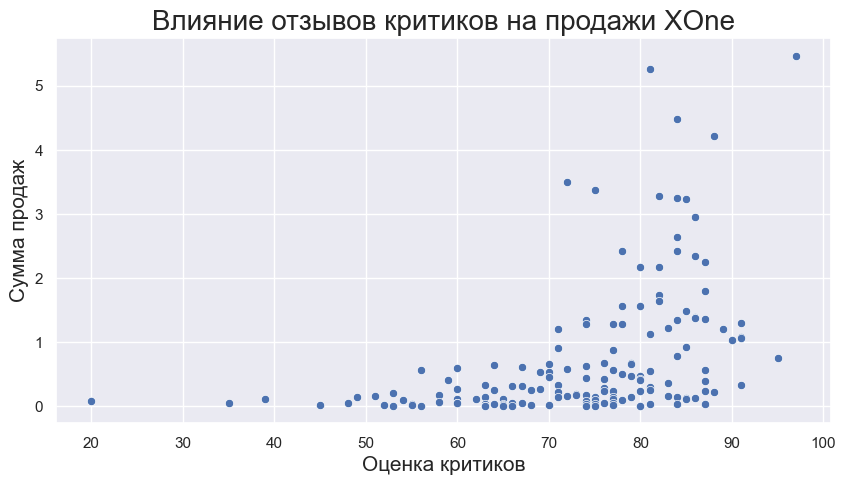

0.43

In [21]:
# XOne
# смотрим корреляцию с отзывами критиков
# делаем срез, удаляем строки с нулевым рейтингом
xone_sales_critic_score_correlation = (
    df
    .query('year_of_release >= 2014 and platform == "XOne" and critic_score != 0')
)
# строим диаграмму рассеяния для отзывов критиков
plt.figure(figsize=(10,5))
(
    sns.scatterplot
    (
        data=xone_sales_critic_score_correlation,
        x='critic_score',
        y='total_sales'
    )
)
plt.title('Влияние отзывов критиков на продажи XOne', fontsize=20)
plt.xlabel('Оценка критиков', fontsize=15)
plt.ylabel('Сумма продаж', fontsize=15)
plt.show()
(
    round
    (
        xone_sales_critic_score_correlation['total_sales']
        .corr(xone_sales_critic_score_correlation['critic_score']), 2
    )
)

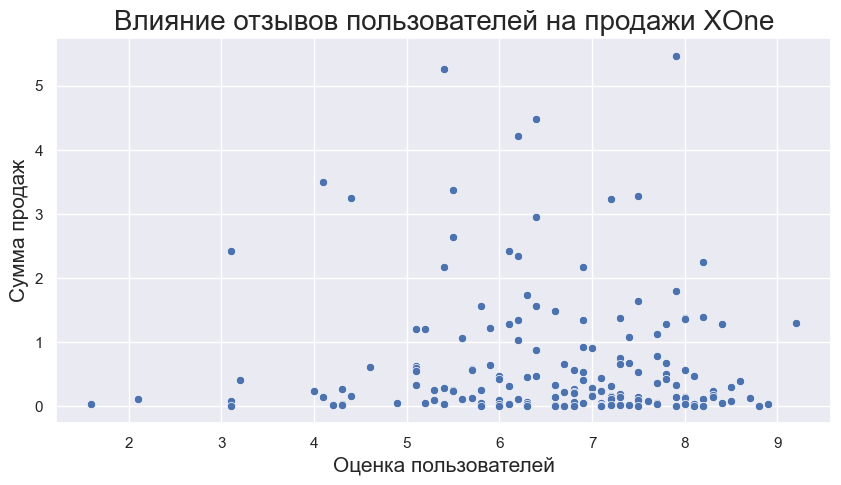

-0.07

In [22]:
# XOne
# смотрим корреляцию с отзывами пользователей
# делаем срез, удаляем строки с нулевым рейтингом
xone_sales_user_score_correlation = (
    df
    .query('year_of_release >= 2014 and platform == "XOne" and user_score != 0')
)
# строим диаграмму рассеяния для отзывов критиков
plt.figure(figsize=(10,5))
(
    sns.scatterplot
    (
        data=xone_sales_user_score_correlation,
        x='user_score',
        y='total_sales'
    )
)
plt.title('Влияние отзывов пользователей на продажи XOne', fontsize=20)
plt.xlabel('Оценка пользователей', fontsize=15)
plt.ylabel('Сумма продаж', fontsize=15)
plt.show()
(
    round
    (
        xone_sales_user_score_correlation['total_sales']
        .corr(xone_sales_user_score_correlation['user_score']), 2
    )
)

Как видно на графиках, результаты идентичны ситуации с **PS4**: от `отзывов критиков` есть `прямая средняя зависимость`, а от `отзывов пользователей её нет`, хотя количество кассовых продуктов с `оценкой пользователей больше 6`, по-прежнему, `выше`.

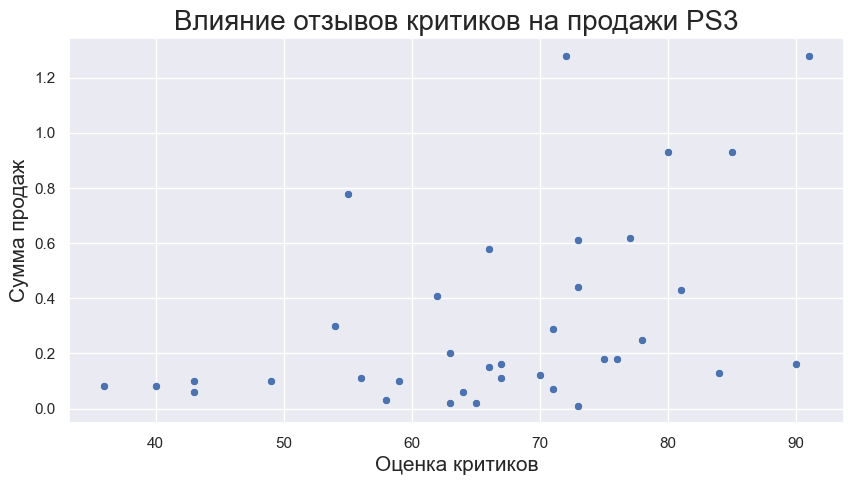

0.45

In [23]:
# PS3
# смотрим корреляцию с отзывами критиков
# делаем срез, удаляем строки с нулевым рейтингом
ps3_sales_critic_score_correlation = (
    df
    .query('year_of_release >= 2014 and platform == "PS3" and critic_score != 0')
)
# строим диаграмму рассеяния для отзывов критиков
plt.figure(figsize=(10,5))
(
    sns.scatterplot
    (
        data=ps3_sales_critic_score_correlation,
        x='critic_score',
        y='total_sales'
    )
)
plt.title('Влияние отзывов критиков на продажи PS3', fontsize=20)
plt.xlabel('Оценка критиков', fontsize=15)
plt.ylabel('Сумма продаж', fontsize=15)
plt.show()
(
    round
    (
        ps3_sales_critic_score_correlation['total_sales']
        .corr(ps3_sales_critic_score_correlation['critic_score']), 2
    )
)

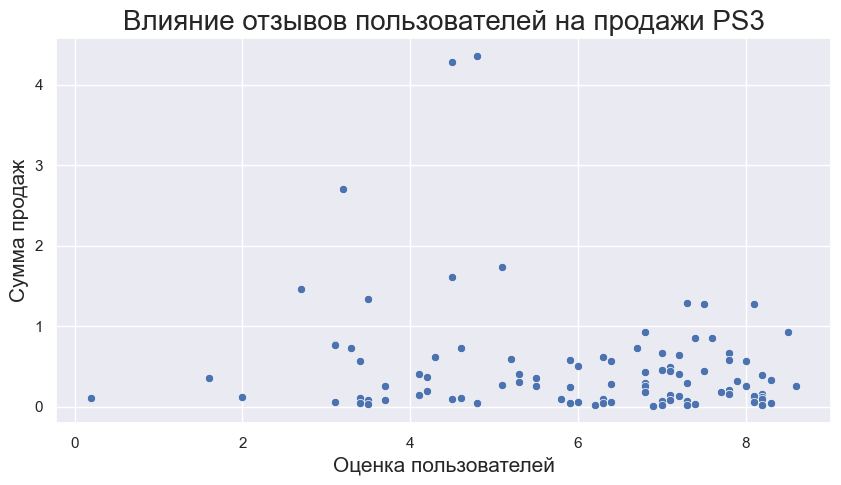

-0.17

In [24]:
# PS3
# смотрим корреляцию с отзывами пользователей
# делаем срез, удаляем строки с нулевым рейтингом
ps3_sales_user_score_correlation = (
    df
    .query('year_of_release >= 2014 and platform == "PS3" and user_score != 0')
)
# строим диаграмму рассеяния для отзывов критиков
plt.figure(figsize=(10,5))
(
    sns.scatterplot
    (
        data=ps3_sales_user_score_correlation,
        x='user_score',
        y='total_sales'
    )
)
plt.title('Влияние отзывов пользователей на продажи PS3', fontsize=20)
plt.xlabel('Оценка пользователей', fontsize=15)
plt.ylabel('Сумма продаж', fontsize=15)
plt.show()
(
    round
    (
        ps3_sales_user_score_correlation['total_sales']
        .corr(ps3_sales_user_score_correlation['user_score']), 2
    )
)

В случае с **PS3** ситуация немного отличается: корреляция с `отзывами критиков` уже `меньше`, но корреляции с `отзывами пользователей` так же `нет`. Ещё одно заметное отличие - количество проектов и `количество проектов с высокой суммой` продаж `значительно меньше`. Скорее всего это объясняется тем, что платформу уже можно считать устаревшей и, возможно, не все самые кассовые игры были на ней выпущены, либо основную кассу эти проекты собрали на актуальных платформах.

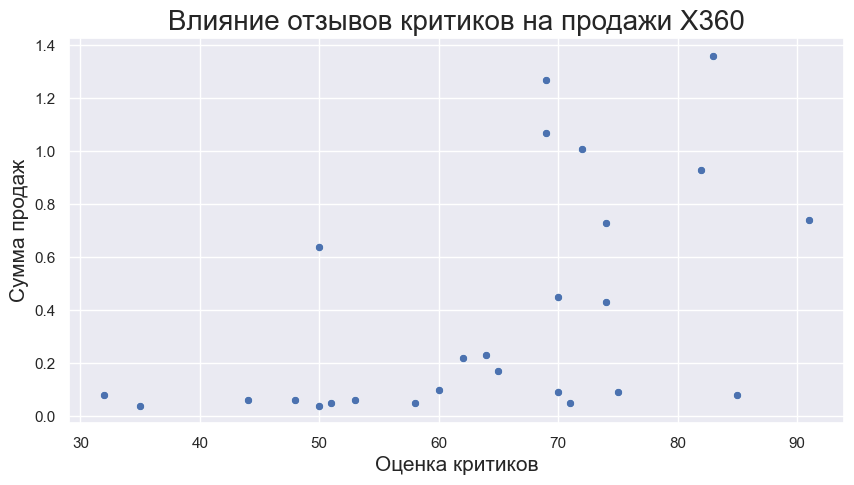

0.53

In [25]:
# X360
# смотрим корреляцию с отзывами критиков
# делаем срез, удаляем строки с нулевым рейтингом
x360_sales_critic_score_correlation = (
    df
    .query('year_of_release >= 2014 and platform == "X360" and critic_score != 0')
)
# строим диаграмму рассеяния для отзывов критиков
plt.figure(figsize=(10,5))
(
    sns.scatterplot
    (
        data=x360_sales_critic_score_correlation,
        x='critic_score',
        y='total_sales'
    )
)
plt.title('Влияние отзывов критиков на продажи X360', fontsize=20)
plt.xlabel('Оценка критиков', fontsize=15)
plt.ylabel('Сумма продаж', fontsize=15)
plt.show()
(
    round
    (
        x360_sales_critic_score_correlation['total_sales']
        .corr(x360_sales_critic_score_correlation['critic_score']), 2
    )
)

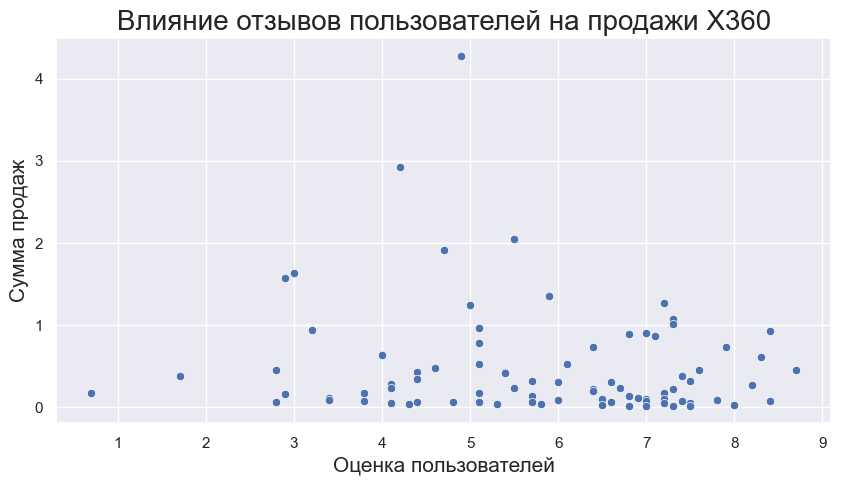

-0.14

In [26]:
# X360
# смотрим корреляцию с отзывами пользователей
# делаем срез, удаляем строки с нулевым рейтингом
x360_sales_user_score_correlation = (
    df
    .query('year_of_release >= 2014 and platform == "X360" and user_score != 0')
)
# строим диаграмму рассеяния для отзывов критиков
plt.figure(figsize=(10,5))
(
    sns.scatterplot
    (
        data=x360_sales_user_score_correlation,
        x='user_score',
        y='total_sales'
    )
)
plt.title('Влияние отзывов пользователей на продажи X360', fontsize=20)
plt.xlabel('Оценка пользователей', fontsize=15)
plt.ylabel('Сумма продаж', fontsize=15)
plt.show()
(
    round
    (
        x360_sales_user_score_correlation['total_sales']
        .corr(x360_sales_user_score_correlation['user_score']), 2
    )
)

Ситуация с **Xbox 360** практически полностью идентична ситуации с **PS3**: `корреляция кассовых проектов` с `отзывами критиков прямая, чуть ниже средней`, а с `отзывами пользователей её нет`. То же самое касается и `количества проектов`. Можно сделать вывод, что `платформа устарела и не является перспективной`.

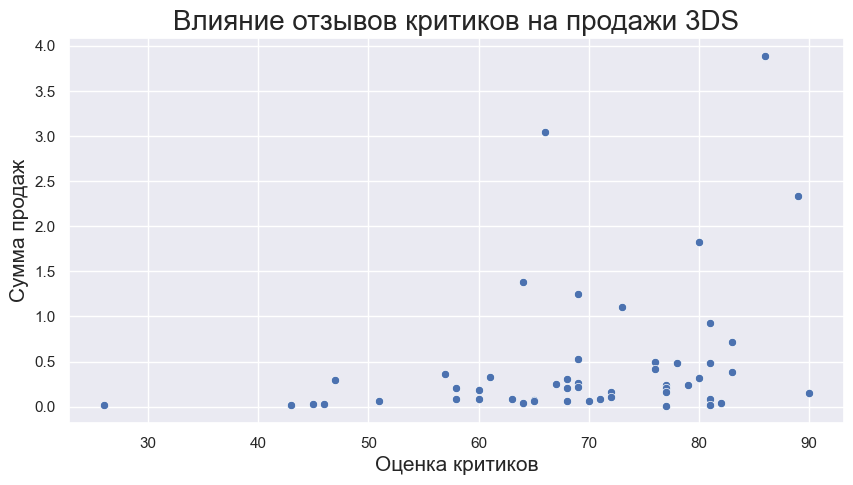

0.31

In [27]:
# 3DS
# смотрим корреляцию с отзывами критиков
# делаем срез, удаляем строки с нулевым рейтингом
ds3_sales_critic_score_correlation = (
    df
    .query('year_of_release >= 2014 and platform == "3DS" and critic_score != 0')
)
# строим диаграмму рассеяния для отзывов критиков
plt.figure(figsize=(10,5))
(
    sns.scatterplot
    (
        data=ds3_sales_critic_score_correlation,
        x='critic_score',
        y='total_sales'
    )
)
plt.title('Влияние отзывов критиков на продажи 3DS', fontsize=20)
plt.xlabel('Оценка критиков', fontsize=15)
plt.ylabel('Сумма продаж', fontsize=15)
plt.show()
(
    round
    (
        ds3_sales_critic_score_correlation['total_sales']
        .corr(ds3_sales_critic_score_correlation['critic_score']), 2
    )
)

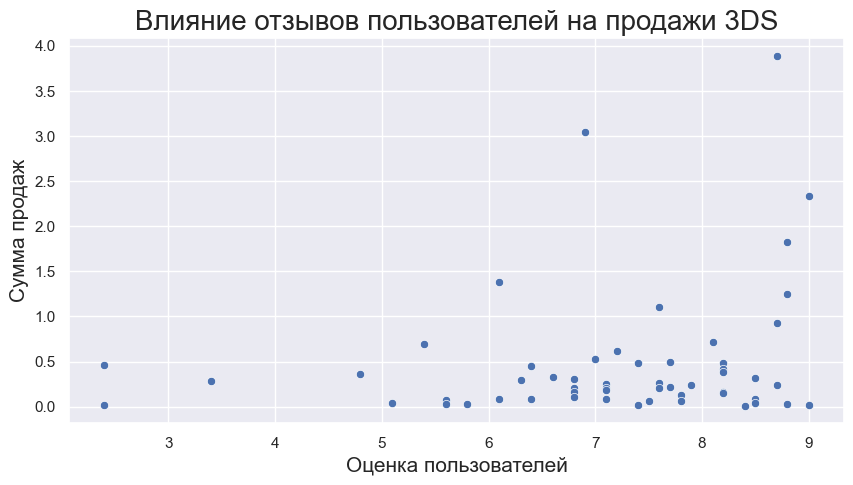

0.22

In [28]:
# 3DS
# смотрим корреляцию с отзывами пользователей
# делаем срез, удаляем строки с нулевым рейтингом
ds3_sales_user_score_correlation = (
    df
    .query('year_of_release >= 2014 and platform == "3DS" and user_score != 0')
)
# строим диаграмму рассеяния для отзывов критиков
plt.figure(figsize=(10,5))
(
    sns.scatterplot
    (
        data=ds3_sales_user_score_correlation,
        x='user_score',
        y='total_sales'
    )
)
plt.title('Влияние отзывов пользователей на продажи 3DS', fontsize=20)
plt.xlabel('Оценка пользователей', fontsize=15)
plt.ylabel('Сумма продаж', fontsize=15)
plt.show()
(
    round
    (
        ds3_sales_user_score_correlation['total_sales']
        .corr(ds3_sales_user_score_correlation['user_score']), 2
    )
)

В ситуации с **3DS** также прослеживается `корреляция` между `отзывами критиков` и `кассовыми проектами`, но ещё это первая платформа, где наблюдается хоть слабая, но `кореляция кассовых проектов` с `отзывами пользователей`.

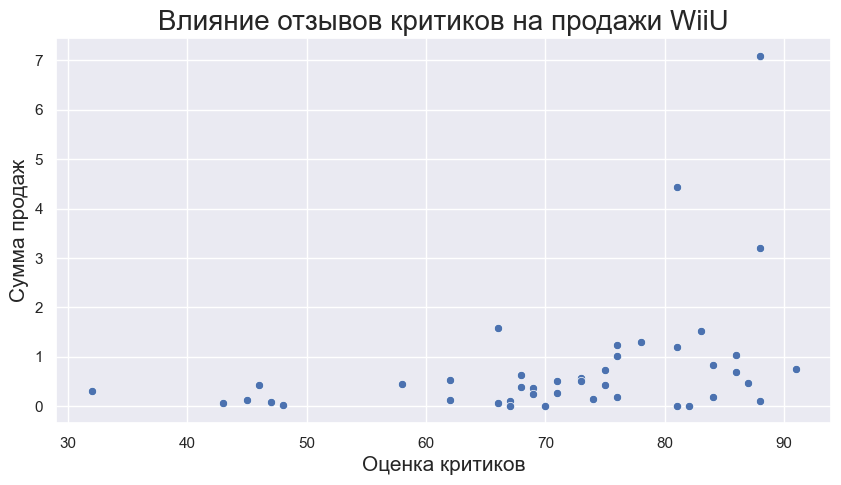

0.37

In [29]:
# WiiU
# смотрим корреляцию с отзывами критиков
# делаем срез, удаляем строки с нулевым рейтингом
wiiu_sales_critic_score_correlation = (
    df
    .query('year_of_release >= 2014 and platform == "WiiU" and critic_score != 0')
)
# строим диаграмму рассеяния для отзывов критиков
plt.figure(figsize=(10,5))
(
    sns.scatterplot
    (
        data=wiiu_sales_critic_score_correlation,
        x='critic_score',
        y='total_sales'
    )
)
plt.title('Влияние отзывов критиков на продажи WiiU', fontsize=20)
plt.xlabel('Оценка критиков', fontsize=15)
plt.ylabel('Сумма продаж', fontsize=15)
plt.show()
(
    round
    (
        wiiu_sales_critic_score_correlation['total_sales']
        .corr(wiiu_sales_critic_score_correlation['critic_score']), 2
    )
)

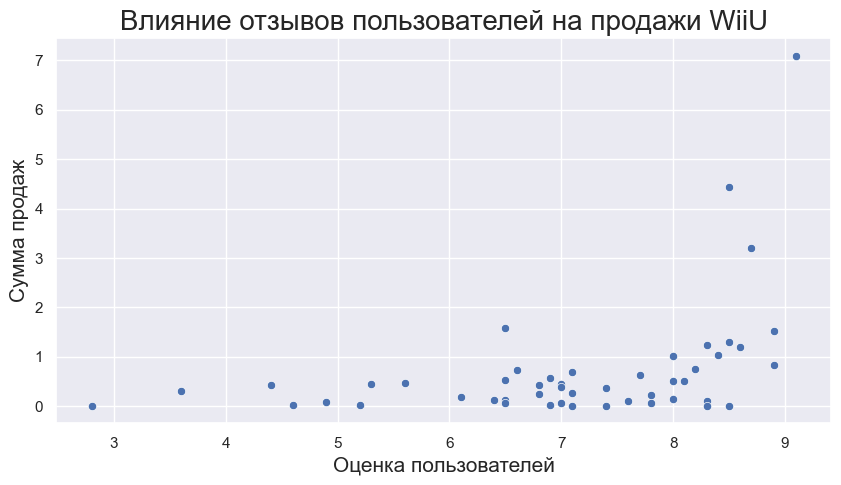

0.41

In [30]:
# WiiU
# смотрим корреляцию с отзывами пользователей
# делаем срез, удаляем строки с нулевым рейтингом
wiiu_sales_user_score_correlation = (
    df
    .query('year_of_release >= 2014 and platform == "WiiU" and user_score != 0')
)
# строим диаграмму рассеяния для отзывов критиков
plt.figure(figsize=(10,5))
(
    sns.scatterplot
    (
        data=wiiu_sales_user_score_correlation,
        x='user_score',
        y='total_sales'
    )
)
plt.title('Влияние отзывов пользователей на продажи WiiU', fontsize=20)
plt.xlabel('Оценка пользователей', fontsize=15)
plt.ylabel('Сумма продаж', fontsize=15)
plt.show()
(
    round
    (
        wiiu_sales_user_score_correlation['total_sales']
        .corr(wiiu_sales_user_score_correlation['user_score']), 2
    )
)

Платформа **WiiU** отличается от прочих тем, что это единственная из анализируемых платформ, на которой `корреляция между продажами игр` и `отзывами пользователей, хоть и немного, но больше, чем корреляция продаж с отзывами критиков`. Также на этой `платформе`, за анализируемый период, `нет ни одного кассового проекта с оценкой пользователей` менее **6,5**. Можно сделать вывод, что коммьюнити платформы **WiiU** очень внимательно относится к выбору игры для покупки и `в первую очередь` обращает внимание на `отзывы других игроков`.

### Распределение игр по жанрам

,Игры
genre,
Action,619
Role-Playing,221
Adventure,185
Sports,161
Shooter,128
Misc,113
Racing,69
Fighting,60
Simulation,44


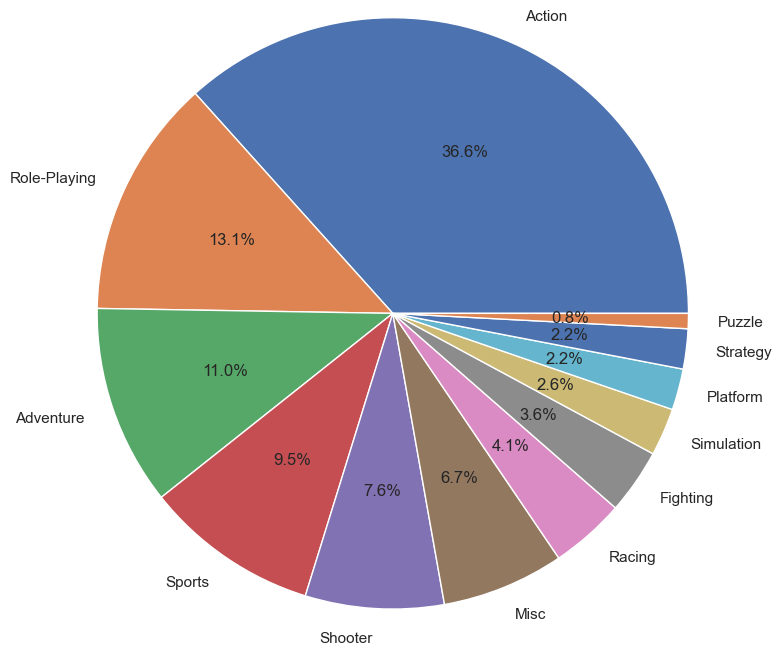

In [31]:
# строим сводную таблицу и диаграмму по жанрам
actual_period_games_pivot = (
    actual_period
    .pivot_table
    (
        index='genre',
        values='name',
        aggfunc='count'
    )
    .sort_values
    (
        by='name',
        ascending=False
    )
)
(
    actual_period_games_pivot
    .plot
    .pie
    (
        y='name',
        radius=(2),
        legend=False,
        autopct='%1.1f%%'
    )
)
actual_period_games_pivot.columns = ['Игры']
actual_period_games_pivot

In [32]:
# строим сводную таблицу и диаграмму с продажами по жанрам
actual_period_sales_pivot = (
    actual_period
    .pivot_table
    (
        index='genre',
        values='total_sales',
        aggfunc='sum'
    )
    .sort_values
    (
        by='total_sales',
        ascending=False
    )
)
actual_period_sales_pivot.columns = ['Продано копий']
actual_period_sales_pivot

,Продано копий
genre,
Action,199.360001
Shooter,170.940002
Sports,109.480003
Role-Playing,101.440002
Misc,37.549999
Fighting,28.219999
Racing,27.520000
Platform,18.090000
Adventure,17.549999


In [33]:
# объединяем полученные таблицы в одну
actual_period_genres_pivot = (
    actual_period_games_pivot
    .merge
    (
        actual_period_sales_pivot,
        on='genre'
    )
)
# считаем соотношение игр к прибыли
actual_period_genres_pivot['Копий в среднем'] = (
    actual_period_genres_pivot['Продано копий'] / 
    actual_period_genres_pivot['Игры']
)
(
    actual_period_genres_pivot
    .sort_values
    (
        by='Копий в среднем',
        ascending=False
    )
)

,Игры,Продано копий,Копий в среднем
genre,,,
Shooter,128,170.940002,1.335469
Sports,161,109.480003,0.680000
Platform,38,18.090000,0.476053
Fighting,60,28.219999,0.470333
Role-Playing,221,101.440002,0.459005
Racing,69,27.520000,0.398841
Misc,113,37.549999,0.332301
Action,619,199.360001,0.322068
Simulation,44,13.130000,0.298409


По `количеству игр` лидирует жанр **Action**, в 3 раза меньше игр жанров **Role-Playing** и **Adventure**. `Меньше всего` игр жанра **Puzzle** и **Strategy**.\
\
Больше всего продаж так же у жанра **Action** на втором месте с небольшим отставанием идёт **Shooter**, далее с большим отставанием идут **Sports** и **Role-Playing**. В `аутсайдерах` числятся **Puzzle** и **Strategy**. Из этих результатов можно сделать вывод, что людей `больше привлекают динамичные жанры и жанр ролевых игр`, где возможно более полно погрузиться в другой мир и отвлечься от рутинных дел.\
\
Однако, `самым прибыльным жанром` является **Shooter**: в среднем, каждая игра этого жанра продаётся больше, чем `1,3 млн. копий`. На втором месте идёт жанр **Sports** - **0,68 млн.** копий. Далее жанры **Platform**, **Fighting** и **Role-Playing** с примерно одинаковыми продажами - около **0,45 млн.** копий.\
`Жанры с самыми слабыми продажами` на игру это **Adventure**, **Strategy** и **Puzzle**. Жанр **Action** - лидер по количеству продаж, опускается на 8 место, так как количество игр этого жанра значительно больше всех остальных и при рассчёте среднего числа проданных копий показывает только около **0,32 млн.** копий с игры.

### Портрет пользователей разных регионов
#### Топ 5 платформ

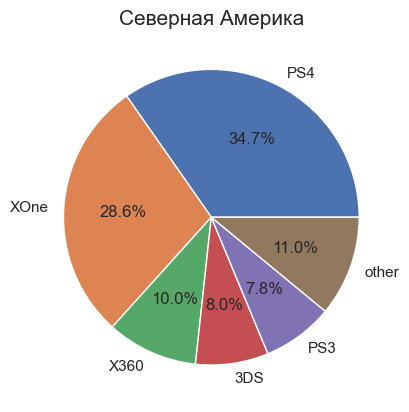

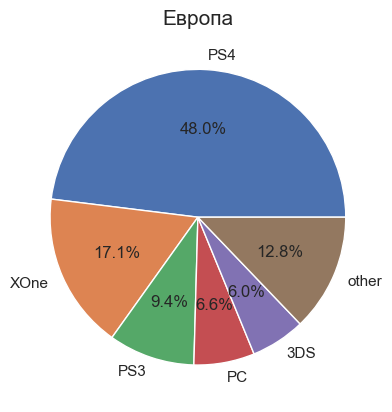

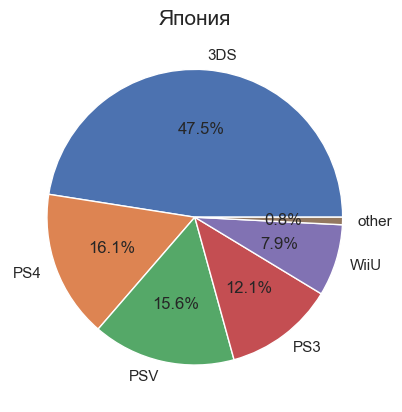

In [34]:
# создаём функцию для постройки диаграмм по регионам
def top_platform(region):
# сводная таблица с не входящими в топ 5 платформами
    not_top_5 = (
        actual_period
        .pivot_table
        (
            index='platform',
            values=region,
            aggfunc='sum'
        )
        .sort_values
        (
            by=region,
            ascending=False
        )
        [5:]
    )
# сводная таблица с топ 5 платформами
    top_5 = (
        actual_period
        .pivot_table
        (
            index='platform',
            values=region,
            aggfunc='sum'
        )
        .sort_values
        (
            by=region,
            ascending=False
        )
        [:5]
        .reset_index()
    )
# добавляем все платформы не из топ 5 в топ 5 одной строкой
# строим диаграммы
    other = {'platform': 'other', region: not_top_5[region].sum()}
    (
        top_5
        .append
        (
            other,
            ignore_index=True
        )
        .set_index('platform')
        .plot
        .pie
        (
            y=region,
            radius=(1),
            legend=False,
            autopct='%1.1f%%'
        )
    )
    if region == 'na_sales':
        plt.title('Северная Америка', fontsize=15)
    elif region == 'eu_sales':
        plt.title('Европа', fontsize=15)
    else:
        plt.title('Япония', fontsize=15)
    plt.ylabel(None)
    plt.show()
top_platform('na_sales')
top_platform('eu_sales')
top_platform('jp_sales')

В `Северной Америке` лидерство делят актуальные платформы от `Microsoft`- **XOne** и `Sony` - **PS4**. `Nintendo` с **3DS** и платформы прошлого поколоения - **X360** и **PS3** замыкают 5-ку и имеют около **10%** продаж на каждую. Если считать суммарно, то у `Sony` есть небольшой перевес в популярности.\
Иная ситуация в `Европе`, где у **PS4** `почти 50% рынка`. Суммарно у платформ от `Sony` почти **60%** рынка. **3DS** имеет **6%**. В топ 5 появляется платформа **PC** с показателем около **7%**.\
Что касается `Японии`, то там, можно сказать, рынок поделён между `Nintendo` (**55,4%**) и `Sony` (**43,8**). Так же заметно `преобладание` именно `портативных платформ`. Можно сделать вывод, что американской компании очень сложно конкурировать с местными.

#### Топ 5 жанров

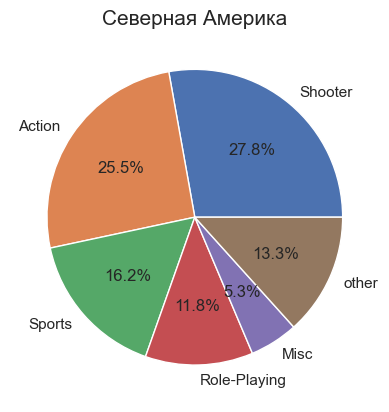

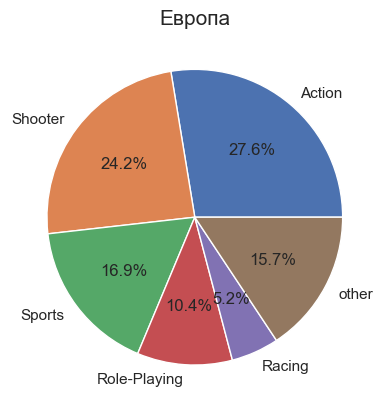

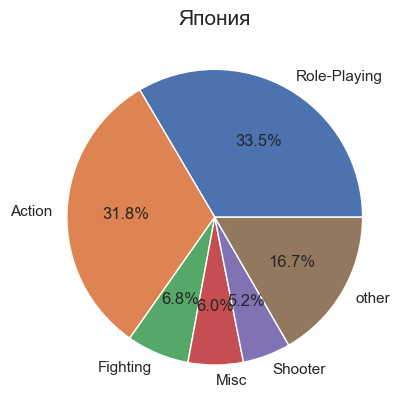

In [35]:
# создаём функцию для постройки диаграмм по регионам
def top_genre(region):
# сводная таблица с не входящими в топ 5 жанрами
    not_top_5 = (
        actual_period
        .pivot_table
        (
            index='genre',
            values=region,
            aggfunc='sum'
        )
        .sort_values
        (
            by=region,
            ascending=False
        )
        [5:]
    )
# сводная таблица с топ 5 платформами
    top_5 = (
        actual_period
        .pivot_table
        (
            index='genre',
            values=region,
            aggfunc='sum'
        )
        .sort_values
        (
            by=region,
            ascending=False
        )
        [:5]
        .reset_index()
    )
# добавляем все жанры не из топ 5 в топ 5 одной строкой
# строим диаграммы
    other = {'genre': 'other', region: not_top_5[region].sum()}
    (
        top_5
        .append
        (
            other,
            ignore_index=True
        )
        .set_index('genre')
        .plot
        .pie
        (
            y=region,
            radius=(1),
            legend=False,
            autopct='%1.1f%%'
        )
    )
    if region == 'na_sales':
        plt.title('Северная Америка', fontsize=15)
    elif region == 'eu_sales':
        plt.title('Европа', fontsize=15)
    else:
        plt.title('Япония', fontsize=15)
    plt.ylabel(None)
    plt.show()
top_genre('na_sales')
top_genre('eu_sales')
top_genre('jp_sales')

Диаграммы по рынку `Северной Америки` и `Европы` практически идентичны: популярны те же самые жанры и даже проценты схожи. Только в Америке с небольшим перевесом лидирует жанр **Shooter**, а в Европе - **Action**. Самые популярные жанры - **Action** и **Shooter**.\
Рынок `Японии` выделяется своим пристрастием к `ролеым играм`. Многие из игр **JRPG** даже не выходят на других рынках, но внутри страны `имеют огромную популярность`. На втором месте, примерно с тем же уровнем рынка - **около 30%** - жанр **Action**.

#### Влияние рейтинга ESRB

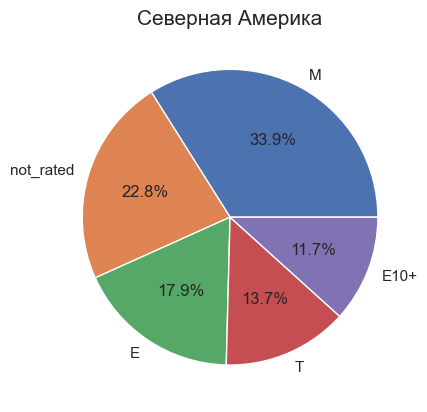

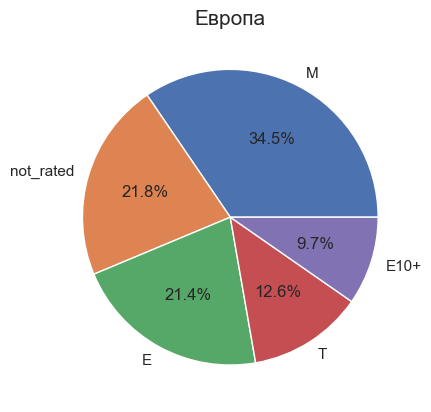

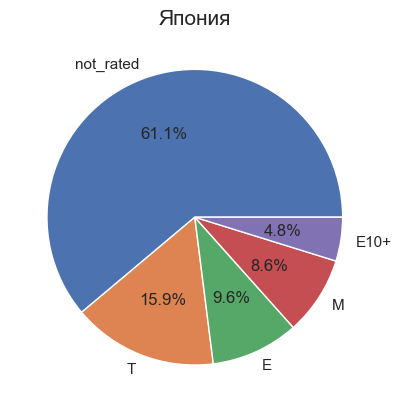

In [36]:
# создаём функцию для постройки диаграмм по регионам
def rating_impact(region):
    (
        actual_period
        .pivot_table
        (
            index='rating',
            values=region,
            aggfunc='sum'
        )
        .sort_values
        (
            by=region,
            ascending=False
        )
        .plot
        .pie
        (
            y=region,
            radius=(1),
            legend=False,
            autopct='%1.1f%%'
        )
    )
    if region == 'na_sales':
        plt.title('Северная Америка', fontsize=15)
    elif region == 'eu_sales':
        plt.title('Европа', fontsize=15)
    else:
        plt.title('Япония', fontsize=15)
    plt.ylabel(None)
    plt.show()
rating_impact('na_sales')
rating_impact('eu_sales')
rating_impact('jp_sales')

В случае с разделением по `рейтингу` регионы `Северная Америка` и `Европа` опять показывают схожие значения. Наибольшую популярность имеют проекты с рейтингом **M** (Для взрослых: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории). Объяснить это возможно запросом на реалистичность, а если вспомнить, что самыми популярными жанрами в этих регионах являются **Action** и **Shooter**, то становится ясно, что без насилия в этих играх никак не обойтись.\
На втором месте находятся игры с рейтингом **E** (Для всех: Содержание вполне подходит для всех возрастов. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера). Это можно объяснить тем, что взрослые часто покупают игры для детей или для того чтобы играть вместе с ними.\
\
В `Японии` видим больше **61%** игр без рейтинга. Объясняется это тем, что в `Японии` есть своя система оценки игр - **CERO**, а оценки от **ESRB** многие местные проекты не получают, так как нацелены на `внутренний рынок`.

### Проверка гипотез

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Сформулируем нулевую и альтернативную гипотезы.\
\
H-0 - `средние пользовательские рейтинги платформы Xbox One` **равны** `средним пользовательским рейтингам платформы PC`\
H-1 - `средние пользовательские рейтинги платформы Xbox One` **не равны** `средним пользовательским рейтингам платформы PC`

In [37]:
# делаем срезы с нужными нам данными, удаляем строки с нулевым значением
xone_ratings = (
    actual_period
    .query('platform == "XOne" and user_score != 0')
)
pc_ratings = (
    actual_period
    .query('platform == "PC" and user_score != 0')
)
results = st.ttest_ind(xone_ratings['user_score'], pc_ratings['user_score'], equal_var=False)
# вероятность ошибочного отклонения истинной нулевой гипотезы установим на 5%
alpha = .05
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
  print('Отвергаем нулевую гипотезу')
else:
  print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.1160154559677266
Не получилось отвергнуть нулевую гипотезу


`Нулевую гипотезу отвергнуть не получилось`, а значит `средние пользовательские рейтинги` платформы **Xbox One** **`равны`** `средним пользовательским рейтингам` платформы **PC**. Можно предположить, что на этих платформах выходят одни и те же игры, а, следовательно, и рейтинги у них не должны сильно отличаться.

#### Средние пользовательские рейтинги жанров Action и Sports разные
Сформулируем нулевую и альтернативную гипотезы.\
\
H-0 - `средние пользовательские рейтинги жанра Action` **равны** `средним пользовательским рейтингам жанра Sports`\
H-1 - `средние пользовательские рейтинги жанра Action` **не равны** `средним пользовательским рейтингам жанра Sports`

In [38]:
# делаем срезы с нужными нам данными, удаляем строки с нулевым значением
action_ratings = (
    actual_period
    .query('genre == "Action" and user_score != 0')
)
sports_ratings = (
    actual_period
    .query('genre == "Sports" and user_score != 0')
)
results = st.ttest_ind(action_ratings['user_score'], sports_ratings['user_score'], equal_var=False)
# вероятность ошибочного отклонения истинной нулевой гипотезы установим на 5%
alpha = .05
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
  print('Отвергаем нулевую гипотезу')
else:
  print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.1825639880196408e-14
Отвергаем нулевую гипотезу


`Отвергаем нулевую гипотезу`, а значит `средние пользовательские рейтинги` жанра **Action** **`не равны`** `средним пользовательским рейтингам` жанра **Sports**.

## Вывод
Проведя исследовательский анализ данных, мы определили, что самым `актуальным периодом` для формирования прогноза прибыльности игр на **2017** г. является период **с 2014 по 2016** гг.\
Самыми `потенциально прибыльными платформами` являются **PS4** и **Xbox One**, немного отстаёт от них **3DS**. Хоть рынок и находится в состоянии снижения прибыльности платформ, но данные платформы показывают лучшие результаты из всех. На третьем месте по привлекательности находится платформа от Nintendo - **3DS** и её точно стоит рассмотреть, особенно если планируется выпускать игру на рынке `Японии` - там **3DS** является лидером по продажам.\
Выбрав эти 3 платформы, можно охватить большую часть рынков `Северной Америки`, `Европы` и `Японии`.
`Средняя продолжительность жизни` платформы - около **10 лет**, а значит данные платформы ближайшие несколько лет будут актуальны.\
\
Что касается `жанра`, то стоит рассмотреть **Shooter**, как `самый прибыльный` на одну выпущенную игру. Также прибыльностью отличаются игры жанров **Sports**, **Platform**, **Fighting** и **Role-Playing**. Жанр **Action** повсеместно очень популярен, но в нём самая `высокая конкуренция` и в среднем `проект собирает значительно меньшие продажи`, чем в указанных выше жанрах.\
Что касается `приоритета игроков`, то, судя по продажам, можно выделить жанры **Shooter** и **Action** в `Северной Америке` и `Европе` и **Role-Playing** и **Action** в `Японии`.
\
Относительно возрастного рейтинга можно сказать, что в `Северной Америке` и `Европе` популярны игры с возрастным ограничением **до 17 лет**. Насчёт `Японии` можно сделать такое же предположение, однако имеющихся данных по региону недостаточно чтобы это подтвердить: очень много проектов без оценки рейтинга.\
\
Также не стоит забывать, что на выбранных платформах - **PS4**, **Xbox One** на продажи `существенно влияют оценки критиков`, а на платформе **3DS** ещё и `отзывы пользователей`.